In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df_train = pd.read_csv("C:/Users/User/Desktop\Projects/Titanic Logistic/train.csv")
df_test = pd.read_csv("C:/Users/User/Desktop\Projects/Titanic Logistic/test.csv")
# df3 = pd.concat([df, df2], ignore_index= True)
# df3.columns
# df3.head()

In [3]:
import math
df_train_new = df_train.drop(["Name", "Cabin", "Ticket"] , axis = 1)
df_test_new = df_test.drop(["Name", "Cabin", "Ticket"] , axis = 1)


In [ ]:
df_test_new["Age"] = df_test_new["Age"].fillna(df_test_new["Age"].median())
df_test_new["Fare"] = df_test_new["Age"].fillna(df_test_new["Fare"].median())
# df_train_new['Fare'] = np.log1p(df_train_new['Fare'])
# df_test_new['Fare'] = np.log1p(df_test_new['Fare'])

df_test_new.isna().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_train_new['Fare_scaled'] = scaler.fit_transform(df_train_new[['Fare']])
df_test_new['Fare_scaled'] = scaler.fit_transform(df_test_new[['Fare']])


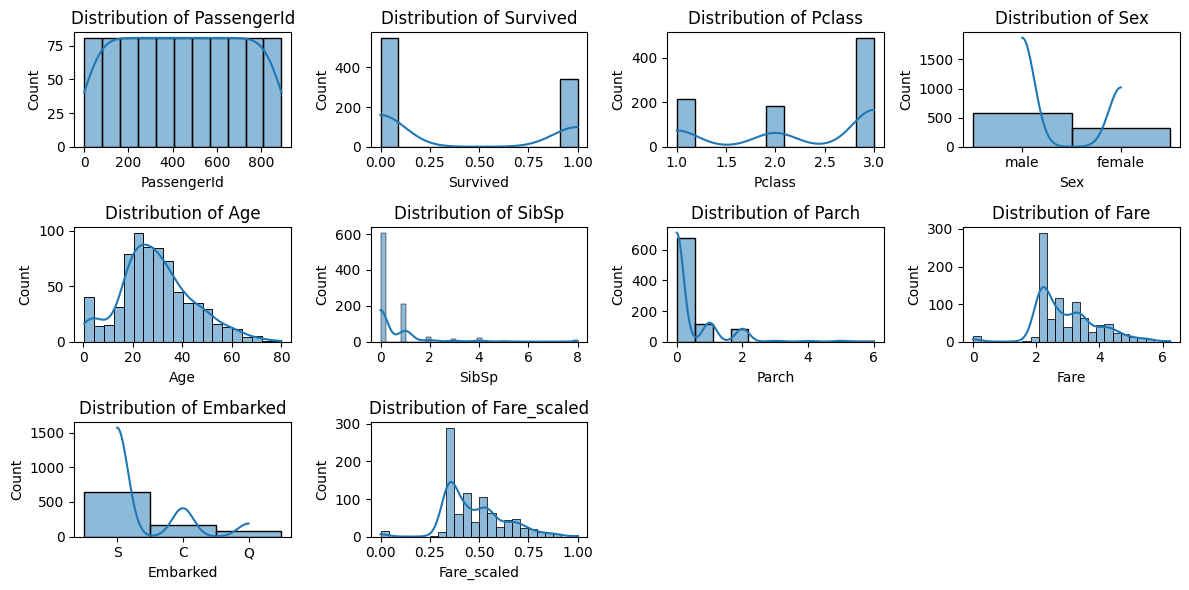

In [6]:

num_cols = len(df_train_new)
cols_per_row = 4  # Customize this
num_rows = 3

fig, axes = plt.subplots(nrows=num_rows, ncols=cols_per_row, figsize=(cols_per_row * 3, num_rows *2))

# Flatten axes to 1D array for easier looping
axes = axes.flatten()

for ax, col in zip(axes, df_train_new.columns):
    sns.histplot(data=df_train_new, x=col, kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')

# Turn off any unused axes
for i in range(len(df_train_new.columns), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()


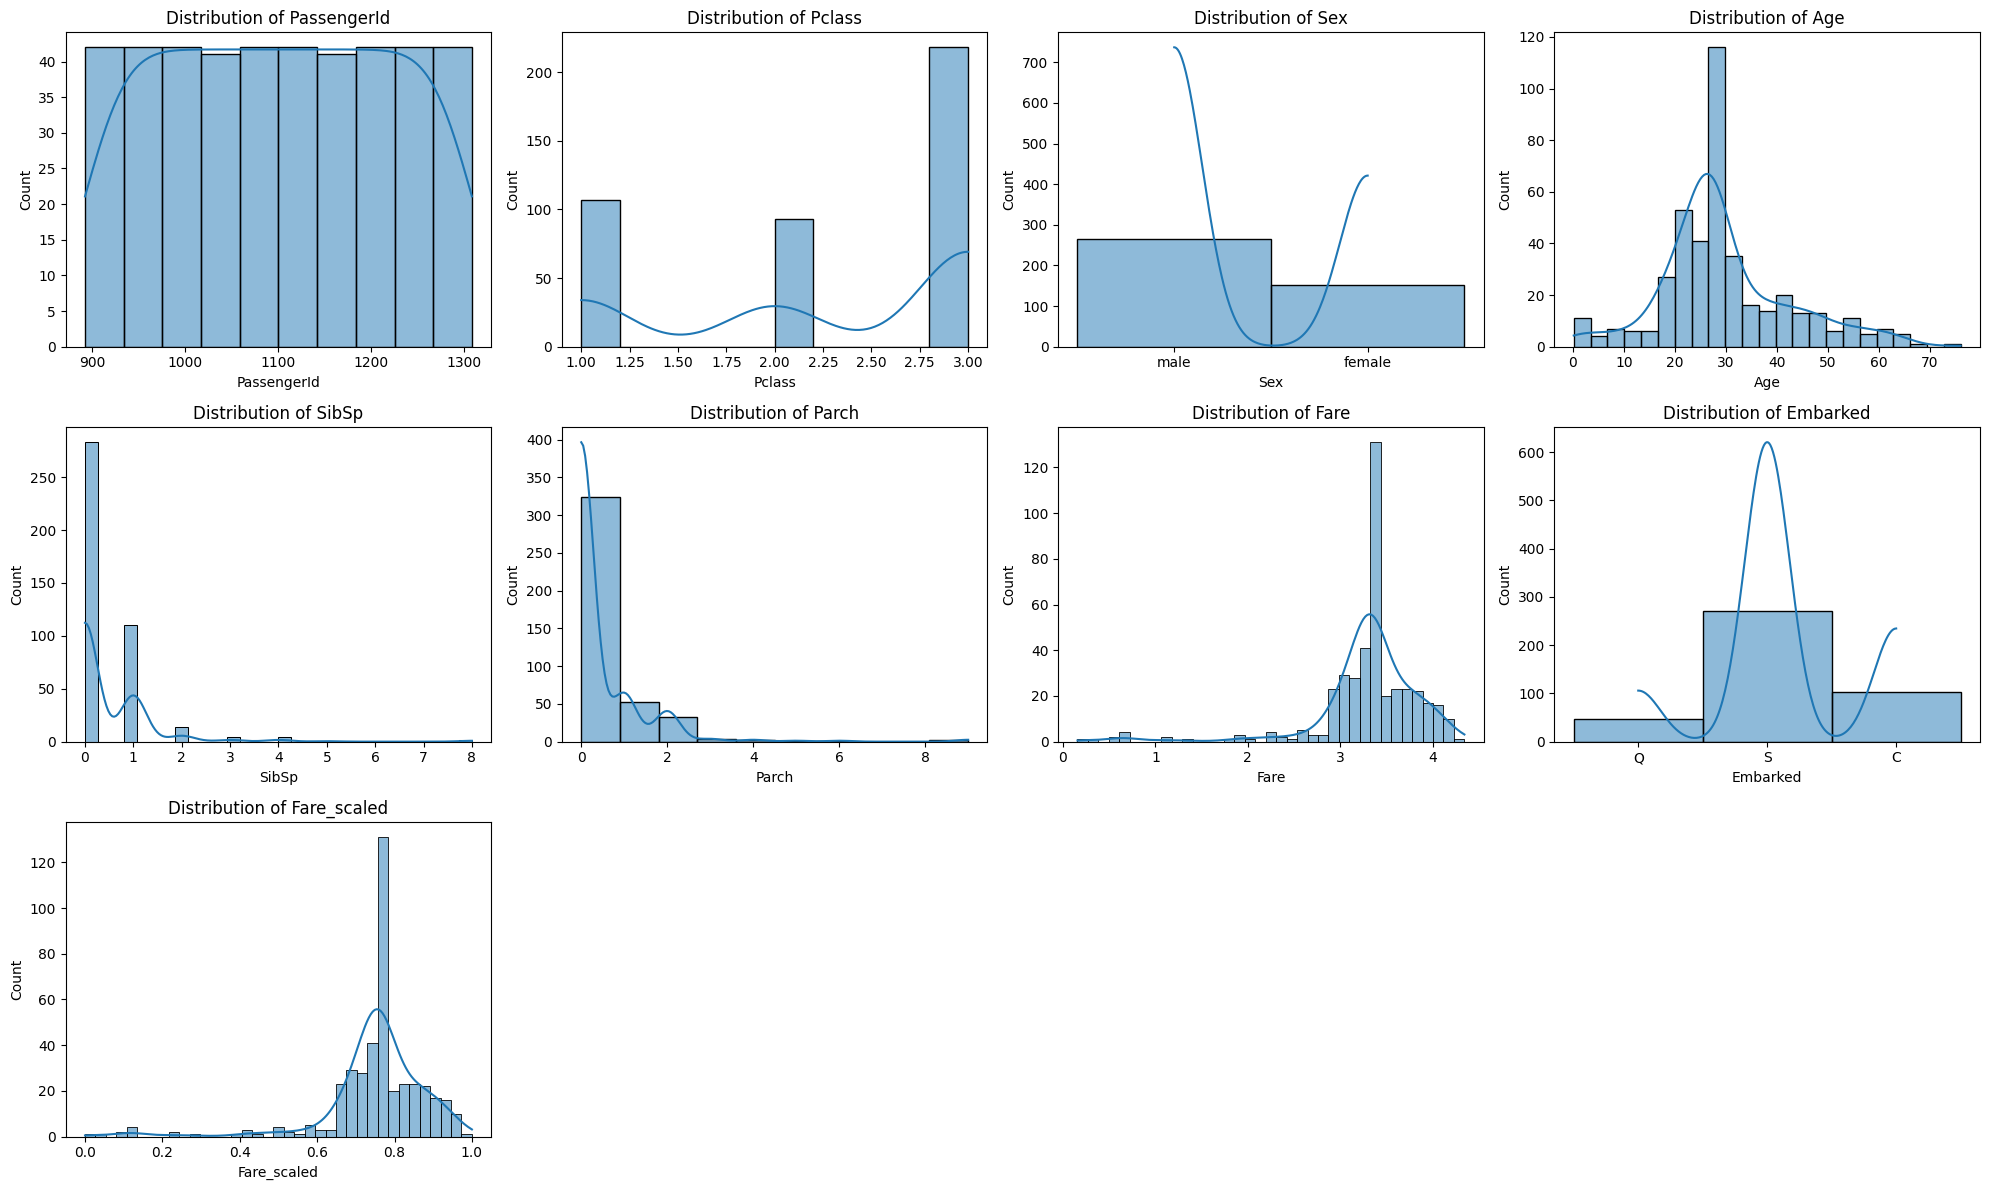

In [7]:
num_cols = len(df_test_new.columns)


cols_per_row = 4  # Customize this
num_rows = math.ceil(num_cols / cols_per_row)

fig, axes = plt.subplots(nrows=num_rows, ncols=cols_per_row, figsize=(cols_per_row * 5, num_rows *4))

# Flatten axes to 1D array for easier looping
axes = axes.flatten()

for ax, col in zip(axes, df_test_new.columns):
    sns.histplot(data=df_test_new, x=col, kde=True, ax=ax)
    ax.set_title(f'Distribution of {col}')

# Turn off any unused axes
for i in range(len(df_test_new.columns), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

In [8]:
df_train_new["Embarked"] = df_train_new["Embarked"].map({"S": 1, "C": 2, "Q": 3})
df_train_new["Sex"] = df_train_new["Sex"].map({"male": 1, "female": 2})

df_test_new["Embarked"] = df_test_new["Embarked"].map({"S": 1, "C": 2, "Q": 3})
df_test_new["Sex"] = df_test_new["Sex"].map({"male": 1, "female": 2})

In [9]:
df_train_new2 = df_train_new.dropna(subset = ["Age", "Embarked"])
df_train_new2.isna().sum()


PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Fare_scaled    0
dtype: int64

In [10]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X = df_train_new2.drop("Survived", axis = 1)
y = df_train_new2["Survived"]

X_test = df_test_new

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.33, random_state=42)
clf = LogisticRegression(max_iter = 150, solver = "liblinear",class_weight = 'balanced')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [11]:
output_df = pd.DataFrame()
output_df["PassengerId"] = X_test["PassengerId"].values
output_df["Survived"] = y_pred

output_df.to_csv("C:/Users/User/Desktop/gender_submission.csv", index = False)